# Overview

As someone who spends quite a bit of time on the Xbox, I figured it is possible to get something apart from entertainment from all the hours lost playing games. One of the games I played heavily for 2-3 years is Smite (now most of my time is taken up by The Witcher and Smite has become more of an occasional thing). In this report, I downloaded and analyzed 150 Smite matches I played between Nov 2019 and April 2020 (the Smite Guru website does not provide full history unfortunately).

[Smite](https://www.smitegame.com/) is a free-to-play, third-person multiplayer online battle arena video game developed and published by Hi-Rez Studios. It is similar to LoL and DOTA but saying that will ruffle some feathers. There are different formats of the game like Conquest (5v5), Jouse (3v3) etc. and I strictly played only the Joust format because (a) it takes about 20-30 minutes per game on average which is not terrible and (b) I started with Joust and never ventured beyond that. I believe the reluctance to try a different game format is also reflective in my consistent TV viewing patterns - I have seen The Office, Friends, It's Always Sunny in Philadelphia, and Breaking Bad way too many times.

My main objective here was to put the skills I obtained from the [Data Analyst](https://www.udacity.com/course/data-analyst-nanodegree--nd002) and [Programming for Data Science](https://www.udacity.com/course/programming-for-data-science-nanodegree--nd104) nanodegrees in practice and analyze my gaming history to generate interesting insights and learn a little bit about my gaming style. Developing a predictive model and digging deeper into key patterns is something I hope to do in the future but it is beyond the scope of this report.

NOTE: This report does NOT contain all the scripts used in gathering, cleaning, and analyzing the data, but only contains the bare minimum necessary to reproduce the validations and so forth. For the full, somewhat unpolished code, check out the script [here](https://github.com/digdeeperisay/Smite-Analysis).

# About the Data

The data for this analysis was extracted from the [Smite Guru website](https://smite.guru/) using Python's BeautifulSoup. You can find the full code and technical details [here](https://github.com/digdeeperisay/Smite-Analysis).. This report only shows the visualizations and key scripts, so please refer to the above link for the full source code.

Each page in the Smite Guru website contains 'x' matches and I believe they store only the last 6 months of data, so I had to download the data and put it in a CSV file to make sure I have permanent access to it. The overall process was looping through each page for my gamer tag and then looping through each match per page. For each match, I was able to collect the following information 

- Match ID
- Time of match
- Duration of match
- Gamer tag/User name (6 records per match since it is a 3v3 format game)
- God (you play as Gods in Smite)
- Win/Loss
- K/D/A (Kills/Deaths/Assists)
- Level 
- Gold
- Damage Dealt/Taken/Mitigated
- Items

As mentioned above, there were 6 records per game so a total of 150 matches * 6 records = 900 records. However, for this analysis, I filtered only my records i.e. Gamer Tag == "My gamer tag" (150 records). So one of the big next steps would be to see how my win/loss patterns change when I include my team mates/opponents performance. 

Loading the final, cleaned Excel here (see 'Cleaning the Data' section below for major transformations) and showing top 10 records of the raw data to visualize the data.

In [70]:
import pandas as pd
df_mine = pd.read_csv('smite_data_cleaned.csv') #Cleaned final data used for the analysis
df_mine.drop('Unnamed: 0',axis=1,inplace=True) #Some random column crept through
df_mine.info()
df_mine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 21 columns):
MatchId            149 non-null int64
MatchDate          149 non-null object
WinLoss            149 non-null object
God                149 non-null object
Level              149 non-null int64
Gold               149 non-null int64
GPM                149 non-null int64
Damage             149 non-null int64
Taken              149 non-null int64
Mitigated          149 non-null int64
Items              149 non-null object
TypeOfGod          149 non-null object
DayOrdered         149 non-null object
DateTime           149 non-null object
IsWin              149 non-null int64
DurationMinutes    149 non-null int64
K                  149 non-null int64
D                  149 non-null int64
A                  149 non-null int64
KDA                149 non-null float64
Dmod               149 non-null int64
dtypes: float64(1), int64(13), object(7)
memory usage: 24.6+ KB


,MatchId,MatchDate,WinLoss,God,Level,Gold,GPM,Damage,Taken,Mitigated,...,TypeOfGod,DayOrdered,DateTime,IsWin,DurationMinutes,K,D,A,KDA,Dmod
0,1015804370,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,13450,708,6401,13998,4700,...,Assassin,Wednesday,2020-03-18 14:44:00,1,19,5,3,11,3.50,3
1,1014902680,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,13793,657,14753,13084,4935,...,Hunter,Sunday,2020-03-15 17:00:00,1,21,10,0,4,12.00,1
2,1013928728,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,21287,546,28658,26946,9298,...,Mage,Thursday,2020-03-12 00:32:00,0,39,2,11,7,0.50,11
3,1011243700,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,14422,687,15670,18489,7858,...,Assassin,Sunday,2020-03-01 20:44:00,1,21,9,3,7,4.17,3
4,1004602957,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,14352,598,24204,13563,4157,...,Mage,Friday,2020-02-07 17:14:00,0,24,4,4,3,1.38,4


# Cleaning the data

In the raw data, most of the variables were initially 'object' data type and needed to be converted into the right data types. Also, lots of columns required transformations to make them fully usable. See below for a quick summary of the cleaning process here but please go through the full code linked above if you want to glance over the actual python scripts.

- Derived a column from the God column to indicate the type of God (In Smite, Gods can be Hunters, Mages, Assasins, Warriors, and Guardians. You can see the full list [here](https://www.smitegame.com/gods/)
- Extracted the actual minutes played from the Duration column
- Converted the MatchDate column into an actual time column and extracted the 'day' into a separate column
- Ordeded the 'day' variable so that charts are plotted Monday through Sunday
- Split out K/D/A (Kills/Deaths/Assists) into separate columns and calculated the KDA ratio (K+A/2)/D. The 'Dmod' column is meant to help with calculating the KDA ratio in cases where the denominator (Deaths) is equal to zero
- Converted W/L into a binary column 1/0
- Converted Level, Gold, GPM, Damage, Taken, and Mitigated into integer columns
- Dropped redundant columns once the above transformations were done and validated

# Analyzing the data

This section is split into two - the first section 'Win Rate and related factors' looks at Win Rate and how different factors impact it. For all purposes, this is the main point of interest in my analysis. The second section 'Other miscellaneous visualizations' is more like a miscellaneous section and highlights other cool insights.

## Win Rate and related factors

One of the first things I wanted to visualize was my overall Win rate. So, I win 55% of the matches I play and apparently that is well above average (Google on your own for more context on what is a good win rate).

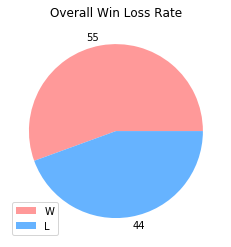

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

wl = df_mine['WinLoss'].value_counts(normalize=True)*100
wl = wl.astype(int)
colors = ['#ff9999','#66b3ff']
labels = wl.index
plt.pie(wl, labels = wl, colors = colors)
plt.title('Overall Win Loss Rate')
plt.legend(labels,loc = 3)
plt.show()

The next thing that interested me was understanding which Gods I played the most and how Win rate differs by that. I knew that I played a lot with Da Ji but I had no idea the difference was this stark! Read more about Da Ji, the nine tailed fox [here](https://smite.gamepedia.com/Da_Ji)

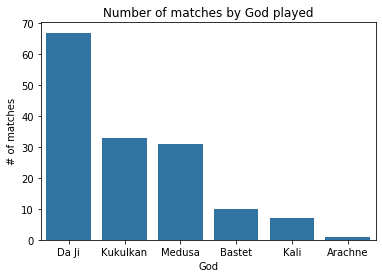

In [25]:
c = sb.color_palette()[0]
sb.countplot(df_mine['God'], color = c, order = df_mine['God'].value_counts().index);
plt.title('Number of matches by God played');
plt.xlabel('God');
plt.ylabel('# of matches');

Amongst the 6 Gods above, 4 of them are of the 'Assassin' type. So I created a derived variable (TypeOfGod) to club different Gods together and see how the Win rate differs by that. Not much of a difference as seen below but I do slightly better with Assassins (be careful!).

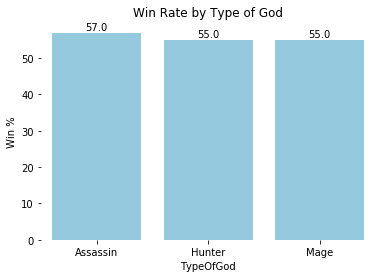

In [30]:
den = df_mine.groupby('TypeOfGod')['MatchId'].count().reset_index()
num = df_mine.query('WinLoss == "W"').groupby('TypeOfGod')['MatchId'].count().reset_index()
full = pd.merge(num, den, on = 'TypeOfGod', suffixes = ('_WinCnt','_TotCnt'))
full['WinRate'] = np.ceil((full['MatchId_WinCnt']/full['MatchId_TotCnt'])*100)

sb.barplot(data = full, x='TypeOfGod', y='WinRate', color = 'skyblue');
plt.ylabel('Win %')
plt.title('Win Rate by Type of God')

for i, v in enumerate(full['WinRate']):
    plt.text(i-0.1, v + 0.7, str(v))

sb.despine(bottom = True, left = True)
plt.show()

I was also curious to see when I usually play and if that has any impact on the Win rate. As seen below (and as expected), I play more on Fridays/Saturdays.

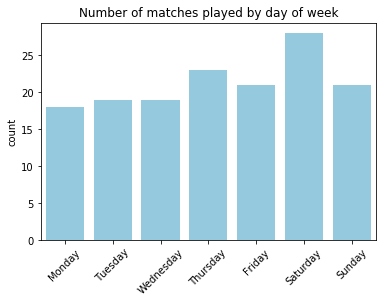

In [34]:
from pandas.api.types import CategoricalDtype
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df_mine['DayOrdered'] = df_mine['DayOrdered'].astype(cat_type)

sb.countplot(x="DayOrdered", data=df_mine,color='skyblue');
plt.xticks(rotation=45);
plt.xlabel('');
plt.title('Number of matches played by day of week'); #clearly happiest on Saturday

But what is fascinating is the higher win rate on Tuesdays! I do not have a hypothesis for it and it is probably just random.

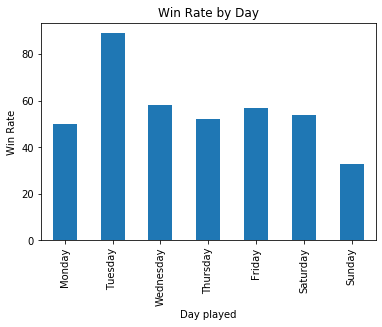

In [36]:
DayByWin = df_mine.groupby('DayOrdered').IsWin.agg('mean').round(2)*100
DayByWin.plot.bar()
plt.xlabel('Day played');
plt.ylabel('Win Rate');
plt.title('Win Rate by Day');
#LOL - what happens on Tuesdays?

In the next set of graphs, I have shown the relationship between Gold obtained and Damage taken/dealt with win/loss. As seen below,

- I get more gold in games that I win
- I deal more damage in games that I win
- I take lesser damage in games that I win

All of this is intuitive.

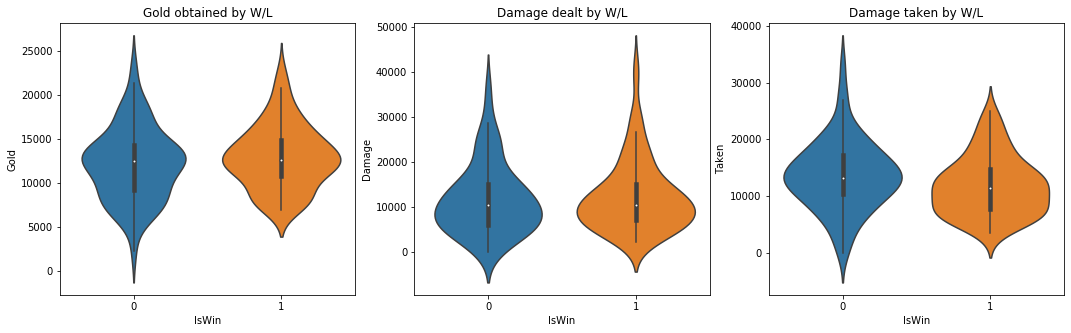

In [61]:
fig, axes = plt.subplots(1, 3, figsize= (18,5))
sb.violinplot(x="IsWin", y="Gold", data=df_mine, ax=axes[0]);
axes[0].set_title('Gold obtained by W/L');
sb.violinplot(x="IsWin", y="Damage", data=df_mine, ax=axes[1]);
axes[1].set_title('Damage dealt by W/L');
sb.violinplot(x="IsWin", y="Taken", data=df_mine, ax=axes[2]);
axes[2].set_title('Damage taken by W/L');

The two other variables of interest that potentially affect the outcome of a game are Level and KDA. In the charts below, I have shown histograms of Level and KDA, followed by their relationship with W/L.

The histograms help get a sense of how the variables are distributed across the 150 matches. The Level variable is slighly skewed to the left and the KDA variable is slighly skewed to the right.

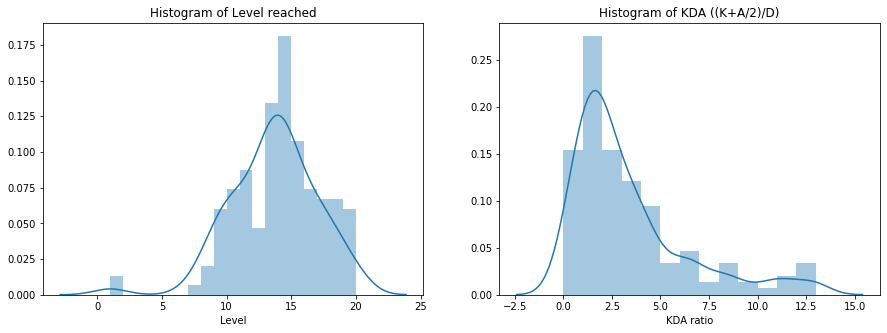

In [63]:
fig, axes = plt.subplots(1, 2, figsize= (15,5))

#Levels histogram
levels = df_mine['Level'].astype(int)
sb.distplot(levels, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], ax=axes[0])
axes[0].set_title('Histogram of Level reached');

#Plotting the KDA. In general, higher the KDA the better
kda = df_mine['KDA']
sb.distplot(kda, ax=axes[1])
plt.xlabel('KDA ratio');
axes[1].set_title('Histogram of KDA ((K+A/2)/D)');

In the charts below, I have shown how Level and KDA affect the outcome of a game. Two interesting insights are

- The Win rate is the highest at Level 20 which is the max level in a game. Does that mean I do really well under pressure? :)
- The KDA chart is super interesting. In games where I have a good KDA, I never lose

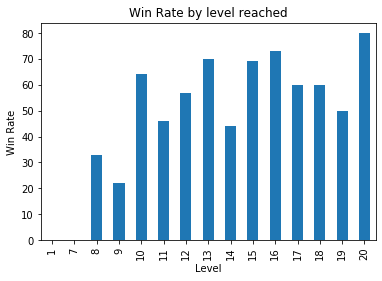

In [64]:
levelByWin = df_mine.groupby('Level').IsWin.agg('mean').round(2)*100
levelByWin.plot.bar()
plt.xlabel('Level');
plt.ylabel('Win Rate');
plt.title('Win Rate by level reached'); #Level 20 is the highest

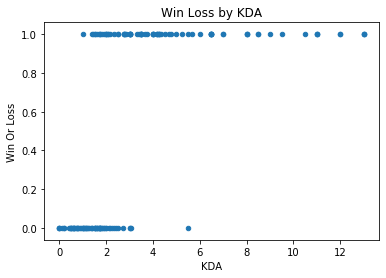

In [65]:
#Scatter plot between KDA and W/L
df_mine.plot(x='KDA', y='IsWin', kind='scatter');
plt.xlabel('KDA');
plt.ylabel('Win Or Loss');
plt.title('Win Loss by KDA');
#Very interesting, so LOSS happens only when KDA is low

The above relationships were the most meaningful and insightful when it comes to predicting a win or loss. In the below charts, I have shown a few other relationships that were pretty interesting!

## Other intersting visualizations

The only set of 'other' visualizations I found very interesting were how certain variables like Gold, Damage etc. differ by God. As seen below, there are clear differences in how different Gods perform.

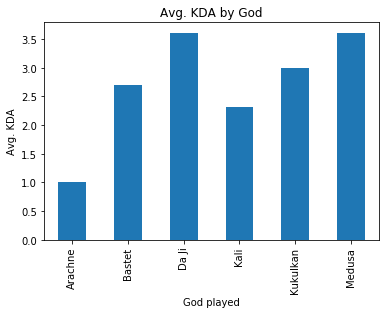

In [66]:
#KDA by God
KDAperGod = df_mine.groupby('God').KDA.agg('mean').round(2)
KDAperGod.plot.bar()
plt.xlabel('God played');
plt.ylabel('Avg. KDA');
plt.title('Avg. KDA by God');

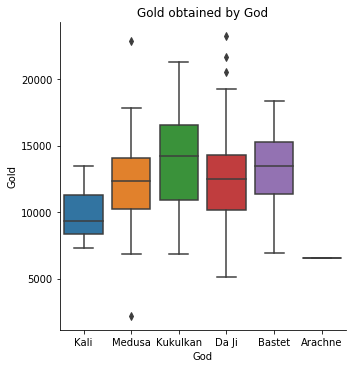

In [67]:
#Gold obtained by God
sb.catplot(x="God", y="Gold", data=df_mine, kind="box");
plt.title('Gold obtained by God');

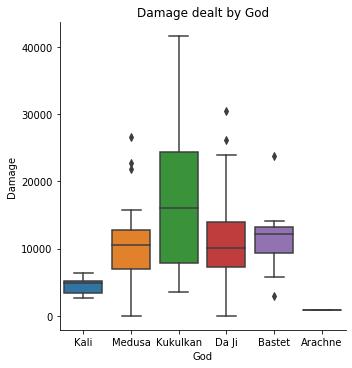

In [68]:
#Damage dealt by God
sb.catplot(x="God", y="Damage", data=df_mine, kind="box");
plt.title('Damage dealt by God');

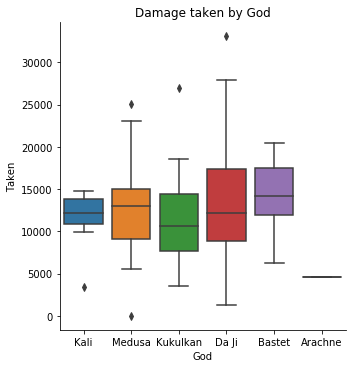

In [69]:
#Damage taken by God
sb.catplot(x="God", y="Taken", data=df_mine, kind="box");
plt.title('Damage taken by God');

# Conclusion

Overall, the main technical things I learned from this exercise were 

- how to use BeautifulSoup to extract data from a website
- how to clean and validate the data using Python and Pandas
- how to visualize relationships between variables of interest using Matplotlib and Seaborn

I learnt a lot about my gaming style as well (I do well when my KDA is high, I play mainly using Assassins, I play well on higher levels and so forth). As mentioned in the Overview, there is ample opportunity to develop a logistic model to predict win/loss and use my teammates/opponents metrics as well in the model. Cheers!